# Non-parametric Statistical Difference Testing


The notebook includes some basic data steps and exploratory data analysis, along with an evaluation of whether the data is parametric, and an appropriate statistical difference test, given the conditions of the data.

Specific steps and assumptions will be shown in each section.

### Dataframe assembly

To assemble the dataframe, the pandas library is used, both to import the data, and for correct formatting. The first five rows of the formatted dataframe are shown below.

In [19]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

filename = "C:/Users/jws0258/Downloads/Klaviyo DS Screen 2.csv"



df = pd.read_csv(filename)
df.columns = ['customer_id', 'gender', 'most_recent_order_date', 'order_count']
df.head()

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,1/1/17 0:11,198.5
1,1001,0,1/1/17 0:29,338.0
2,1002,1,1/1/17 1:30,733.0
3,1003,1,1/1/17 1:34,772.0
4,1004,0,1/1/17 3:11,508.0


## Part B: Plot the count of orders per week

Next, the dataframe will be taken, and all orders for a given week will be grouped by the week in which the order date occurred, and summed, so that a weekly time series of the cumulative number of orders is shown. This will be graphed as a time series.

In [32]:

df['week'] = pd.to_datetime(df['most_recent_order_date'])
df1 = df.groupby(df['week'].dt.week).sum()
df2 = df1.loc[:, ['order_count']]
df2.head()


,order_count
week,
1,54615.45
2,90954.20
3,127004.75
4,73081.92
5,60970.98


Now, the time series of weekly orders will be shown.

<IPython.core.display.Javascript object>


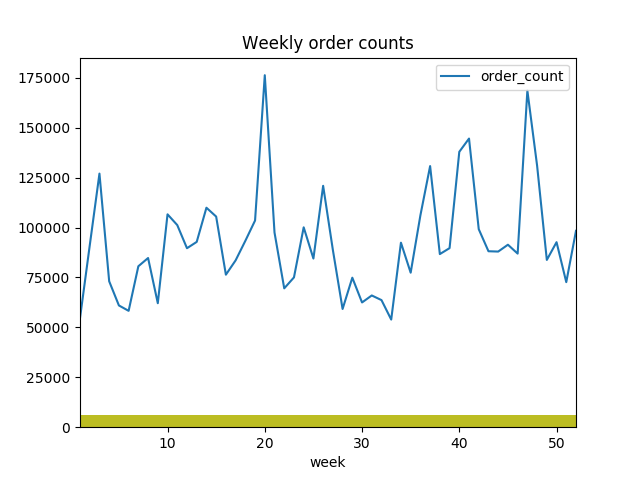

In [33]:

df2.plot(title = 'Weekly order counts')

There are clearly strong seasonal effects in the above time series, and significant week to week variation in the number of orders. 

## Part C: Compute the mean order value for each gender and assess significance of difference

The final problem includes obtaining the weekly average for orders for each gender, and then determining if there is a significant difference. One area that should be approached with caution is using a t-test, or other test that assumes samples are independent and identically distributed. The weekly data for each gender is a time series, so the independence assumption of the data will not hold. 


In [45]:
df3 = df.loc[:,['gender', 'order_count']]
df3 = df3.groupby(df3['gender']).mean()
df3.columns = ['average order count']

print(df3)

        average order count
gender                     
0                363.890006
1                350.708361


To assess the significance of this difference, a t-test will be used. First, some evaluation of the sample statistics will be done to validate assumptions and decide on the specific variant of t-test to be used. First, a check for normality is used. A visual check with a histogram, followed by a statistical test for normality, are used.




<IPython.core.display.Javascript object>


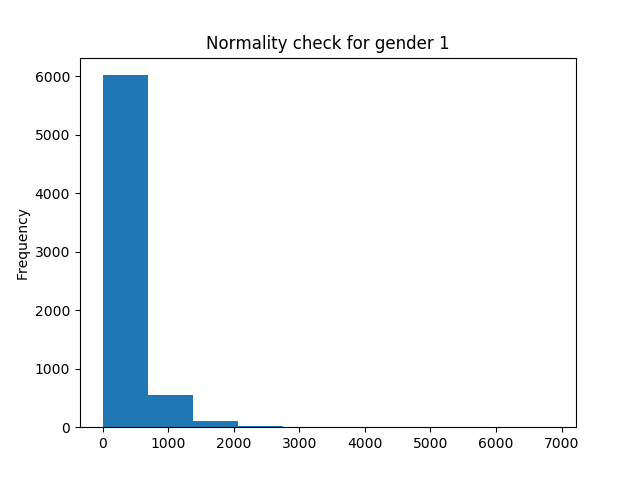

In [76]:
#create subsets based upon gender
%matplotlib notebook
df4_0 = pd.DataFrame(df.loc[df['gender'] == 0,['gender', 'order_count']])
df4_1 = pd.DataFrame(df.loc[df['gender'] == 1,['gender', 'order_count']])

df4_0v = df4_0.loc[:,'order_count']
df4_1v = df4_1.loc[:,'order_count']

df4_1v.plot(kind='hist', title = 'Normality check for gender 1')


<IPython.core.display.Javascript object>


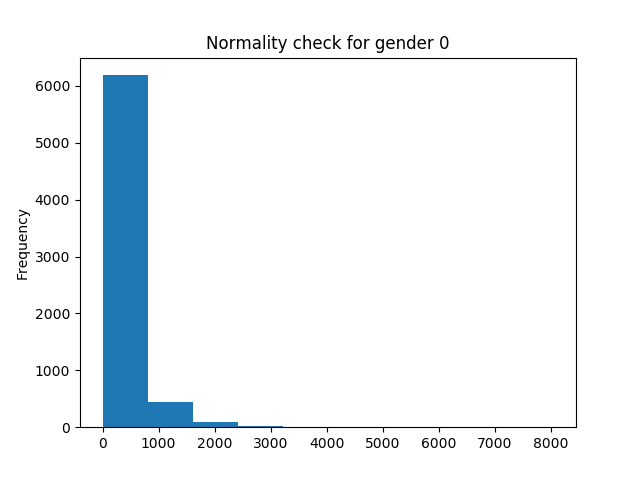

In [78]:

plt.figure()
df4_0v.plot(kind='hist', title = 'Normality check for gender 0')

Both gender's order counts seem to be skewed, suggesting non-normality. To test this observation, D'Agnostino's test is performed as a statistical test for normality. Specifically, it tests skew and kurtosis of the sample data, with the null assumption of skew and kurtosis being equal to what would be expected from a normal distribution, and tests for non-normality.


In [81]:
from scipy.stats import normaltest
teststat_gender_0, p_val_gender0 = normaltest(df4_0v)
teststat_gender_1, p_val_gender1 = normaltest(df4_1v)


print("p-value for gender 0 is: ", p_val_gender0, "p-value for gender 1 is:", p_val_gender1)

p-value for gender 0 is:  0.0 p-value for gender 1 is: 0.0


Since the null assumption of the above test is that it is normally distributed, the near 0 p-values suggest that the data is not normally distributed. A non-parametric test will be used for the significance test of the above genders. Since the samples are not paired, and the sample sizes differ, the Mann_Whitney test will be used to test for significance. Additionally, since the goal is to see if there is a difference, a two-sided hypothesis will be used. For significance, an alpha level of 95% will be used. So, if the p-value is less than .05, the null will be rejected, and if it is equal to or greater than that, the null will not be rejected.

In [84]:
from scipy.stats import mannwhitneyu

wilcox_test_stat, w_p_value = mannwhitneyu(df4_0v, df4_1v, alternative = 'two-sided')

print("The p-value is : ", w_p_value, "and the test statistic is:", wilcox_test_stat)

The p-value is :  0.30441051017 and the test statistic is: 22914963.5


The above p-value is .304. Since the null assumption is that the two distributions are equal, we fail to reject the null, and cannot say that there is a significant difference between genders in terms of order counts.